<a href="https://colab.research.google.com/github/AmirGhnbr/Mnist_fashion_tensorflow/blob/dev_branch/Mnist_fashion_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

print(tf.__version__)

2.8.2


# loading Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
train_data.shape , train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

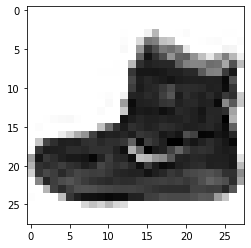

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0],cmap = plt.cm.binary) 

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

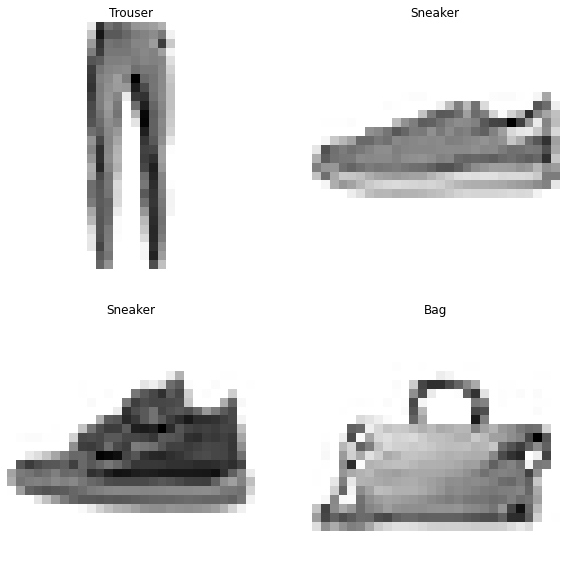

In [7]:
import random
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [10]:
## build the first nn
tf.random.set_seed(42)

## use sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

## compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## fit the model
model_1.fit(train_data, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9300 - accuracy: 0.7292
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6469 - accuracy: 0.7865
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6189 - accuracy: 0.7953
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5631 - accuracy: 0.8148
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5178 - accuracy: 0.8238
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4625 - accuracy: 0.8379
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4349 - accuracy: 0.8459
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4284 - accuracy: 0.8489
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4061 - accuracy: 0.8554
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.400

In [11]:
model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.8418


[0.4771375358104706, 0.8417999744415283]

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


In [13]:
## preprocess the data 
train_data.min(), train_data.max()

(0, 255)

In [15]:
train_data = train_data / 255
test_data =test_data / 255

train_data.min(), train_data.max()

(0.0, 1.0)

In [16]:
## Build model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(150 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

## compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## fit the model
model_2.fit(train_data, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4804 - accuracy: 0.8270
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3573 - accuracy: 0.8691
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3255 - accuracy: 0.8798
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8888
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.8931
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2704 - accuracy: 0.8976
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9028
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9071
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2377 - accuracy: 0.9098
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.230

In [17]:
model_2.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.8847


[0.47938597202301025, 0.8847000002861023]

In [30]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               117750    
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


### 8% improvement in training accuracy and 4% improvement in test accuracy

## Build the next model with different activation function

In [23]:
## Build the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150, activation= "selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(150, activation= "selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(10, activation= "softmax")
])

## compile the model
model_3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

## fit the model
model_3.fit(train_data, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5008 - accuracy: 0.8203
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3844 - accuracy: 0.8590
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3505 - accuracy: 0.8709
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3235 - accuracy: 0.8803
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3053 - accuracy: 0.8857
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2886 - accuracy: 0.8925
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.8965
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2659 - accuracy: 0.8997
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2536 - accuracy: 0.9042
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.245

In [25]:
model_3.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4505 - accuracy: 0.8870


[0.4504771828651428, 0.8870000243186951]

In [27]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 150)               117750    
                                                                 
 dense_25 (Dense)            (None, 150)               22650     
                                                                 
 dense_26 (Dense)            (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


### use elu activation function 

In [26]:
## build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(150, activation= "elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation= "softmax")
])

## compile the model
model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## fit the model
model_4.fit(train_data, train_labels, epochs=30)


Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4748 - accuracy: 0.8284
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3597 - accuracy: 0.8669
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3267 - accuracy: 0.8783
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.8877
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.8932
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2658 - accuracy: 0.8997
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2548 - accuracy: 0.9038
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2423 - accuracy: 0.9091
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2300 - accuracy: 0.9138
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.221

In [28]:
model_4.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.8859


[0.5131916999816895, 0.8859000205993652]

In [29]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 150)               117750    
                                                                 
 dense_28 (Dense)            (None, 150)               22650     
                                                                 
 dense_29 (Dense)            (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


### model with elu activation is performing well 